## NeXLParticle

This example shows how to use NeXLParticle and the 'Zeppelin' struct to load Zeppelin particle data sets and access the tabular, image and spectral data.

In [1]:
using Revise
using NeXLParticle
using NeXLSpectrum
using Gadfly
using DataFrames
using Images

┌ Info: Precompiling NeXLParticle [9f92fee6-ed62-42c3-b009-0e4f934456c2]
└ @ Base loading.jl:1273
┌ Info: Loading NeXLSpectrum Gadfly support
└ @ NeXLSpectrum C:\Users\nicho\.julia\dev\NeXLSpectrum\src\gadflysupport.jl:338


In [2]:
zep=Zeppelin("Zepellin\\test.hdz")

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = catvaluetype at array.jl:614 [inlined]
└ @ Core C:\Users\nicho\.julia\packages\CategoricalArrays\xjesC\src\array.jl:614
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = catvaluetype at array.jl:614 [inlined]
└ @ Core C:\Users\nicho\.julia\packages\CategoricalArrays\xjesC\src\array.jl:614


Zeppelin[Zepellin\test.hdz,(250, 66)]

In [3]:
ENV["columns"]=160
zep.data[1:10, [:NUMBER, :DAVG, :CLASSNAME, :FIRSTELM, :FIRSTPCT, :SECONDELM, :SECONDPCT, :THIRDELM, :THIRDPCT, :FOURTHELM, :FOURTHPCT ]]

,NUMBER,DAVG,CLASSNAME,FIRSTELM,FIRSTPCT,SECONDELM,SECONDPCT,THIRDELM,THIRDPCT,FOURTHELM,FOURTHPCT
,Int64,Float64,Categorical…,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64
1,1,1.83843,Iron-90,26,90.2188,16,5.06622,14,2.26288,27,0.982895
2,2,2.98486,Iron-60,26,60.1755,16,26.9297,15,8.91383,22,3.98096
3,3,3.26079,Iron-90,26,95.6989,16,3.37064,17,0.480769,22,0.44965
4,4,3.50613,Calcite,20,89.9441,14,5.39218,19,1.37551,16,1.21557
5,5,2.39501,Iron-90,26,96.8931,16,1.70033,14,1.40655,0,0.0
6,6,3.59721,Iron-90,26,94.2326,14,3.21053,16,1.34057,13,0.527743
7,7,2.73491,Iron-60,26,65.0324,56,12.629,16,7.0487,14,6.72538
8,8,1.20893,Iron-80,26,83.333,16,5.95446,30,3.88231,14,2.1855
9,9,2.75471,Ba+S,56,39.1567,16,28.5419,26,20.709,20,5.99301


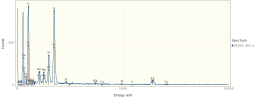

In [4]:
set_default_plot_size(10inch,4inch)
s=zep[102]
imgs = s[:Image]
plot(s,xmax=1.0e4, autoklms=true)

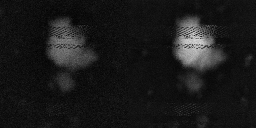

In [5]:
[imgs[:,:,1] imgs[:,:,2]]

In [6]:
s[:StagePosition]

Dict{Symbol,Float64} with 5 entries:
  :Z => 2.50081
  :T => -0.0
  :R => -0.0
  :X => -1.39743
  :Y => 0.81832

In [7]:
elms = ( n"Ag", n"Al", n"Ba", n"Bi", n"Br", n"C", n"Ca", n"Ce", n"Cl", n"Co", n"Cr", n"Cu", n"F", n"Fe", n"K", n"Mg", n"Mn", n"Na", n"Nd", n"Ni", 
    n"O", n"P", n"Pb", n"S", n"Sb", n"Si", n"Sn", n"Sr", n"Ti", n"V", n"W", n"Zn", n"Zr" )
refs = Dict{Element,Spectrum}( elm => readEMSA("Zepellin\\Standards\\$(elm.symbol) std.msa") for elm in elms);

In [8]:
det = matching(refs[n"Fe"],132.0)

EDS[4096 channels, E[ch] = 1.63032 + 9.99856⋅ch, 132.0 eV @ Mn Kα]

In [9]:
res2=NeXLParticle.quantify(zep, det, refs);

┌ Info: k[Ba in BaF2, Ba L3-M5 + 17 others] = 0.7311425030776585
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Pb in K227, Pb L3-M5 + 1 other] = 0.6325302958721861
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[S in FeS2, S K-L3 + 3 others] = 0.4690160144478552
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Br in KBr, Br K-L3 + 1 other] = 0.6219668521669985
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Nd in NdF2, Nd L3-M5 + 2 others] = 0.7407344705916089
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Sr in SrF2, Sr K-L3 + 1 other] = 0.6190759306572752
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[F in CaF2, F K-L3 + 1 other] = 0.09710204130798027
└ @ NeXLParticle C:\Users\nicho\.julia\dev\NeXLParticle\src\signature.jl:19
┌ Info: k[Cl in NaCl, Cl K-L3 +

In [10]:
res2[102:112,:]

,C,O,F,NA
,Uncertai…,Uncertai…,Uncertai…,Uncertai…
1,10.575586096925313 ± 0.012857705567193779,17.44693926209657 ± 0.05072581776092907,0.0 ± 0.9724006050148756,1.2984479534491604 ± 0.00700534745543434
2,13.675367561570054 ± 0.019369640997754067,13.21380726274245 ± 0.052444034912388686,0.0 ± 1.1008659044970657,0.0 ± 0.5019011669925985
3,7.81214865077286 ± 0.008981253110653592,10.498137065292655 ± 0.03125918237139372,0.0 ± 0.8290663874901438,0.0 ± 0.4240864947815788
4,15.806656040391188 ± 0.022247238926751626,17.29597284555026 ± 0.059184075116997414,0.0 ± 1.3282945383084082,0.3440636517503308 ± 0.02159503984121943
5,12.344384650098934 ± 0.015159774720557585,15.113252738739588 ± 0.05098865569733208,0.0 ± 1.001550348666588,0.0 ± 0.6282733547292638
6,9.83483697727855 ± 0.009727739347155283,7.52930705520136 ± 0.03708453535167302,0.0 ± 0.9201393849841919,0.06889131680023682 ± 0.009710094309511965
7,12.2004644867271 ± 0.01564607215927058,11.633919806987324 ± 0.057939988759360656,0.0 ± 1.204905738558852,0.2695941961246421 ± 0.01845085706195424
8,21.481124821535463 ± 0.023308200520743394,19.126631731274212 ± 0.04030402387748711,1.4022948001808617 ± 0.09394631061940449,0.4052089902132139 ± 0.02603575898536
9,12.061244806116227 ± 0.012979077605058603,8.374830992418154 ± 0.03121009334087729,0.0 ± 0.9018904021705106,0.0 ± 0.5347300817376031
